Задача: Есть 2 группы студентов одна их которых ходила на подготовительные курсы, другая нет.
Нужно понять повлияло ли посещение курсов на балл студентов между группами.

Описание данных:
* df_after содержит информацию о баллах после финального тестирования
* df_before содержит информацию о баллах до
* df_group содержит информацию о том, посещали ли студенты подготовительные курсы

Задание будет выполнено с использованием библиотек pandas и scipy.


In [ ]:
import pandas as pd
from scipy import stats as st

## Изучение данных

In [ ]:
df_after = pd.read_csv('https://gist.githubusercontent.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef/raw/66d152e8340035955fda2bd4fb4683f72a86141f/student_after_score.csv')
df_before = pd.read_csv('https://gist.githubusercontent.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef/raw/66d152e8340035955fda2bd4fb4683f72a86141f/student_before_score.csv')
df_group = pd.read_csv('https://gist.githubusercontent.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef/raw/66d152e8340035955fda2bd4fb4683f72a86141f/student_group.csv')

In [ ]:
df_after.head()

,student_id,after_score
0,1,92
1,2,79
2,3,92
3,4,90
4,5,98


In [ ]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   1000 non-null   int64
 1   after_score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


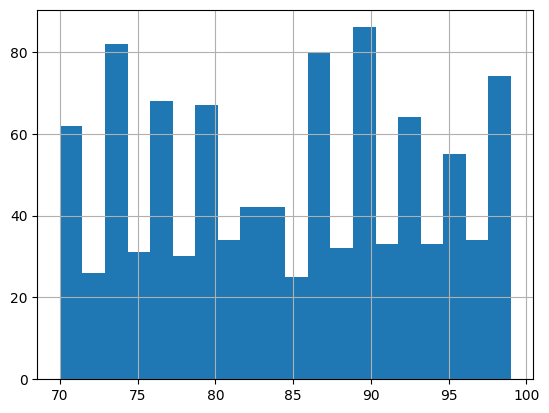

In [ ]:
df_after['after_score'].hist(bins=20);

Размерность данных: два столбца, 1000 строк. Данные в корректном формате. Пропуски отсутствуют. Распределение в целом равномерное, баллы от 70 до 100, аномалий и выбросов нет.

In [ ]:
df_before.head()

,student_id,before_score
0,1,75
1,2,81
2,3,58
3,4,47
4,5,76


In [ ]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   student_id    1000 non-null   int64
 1   before_score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


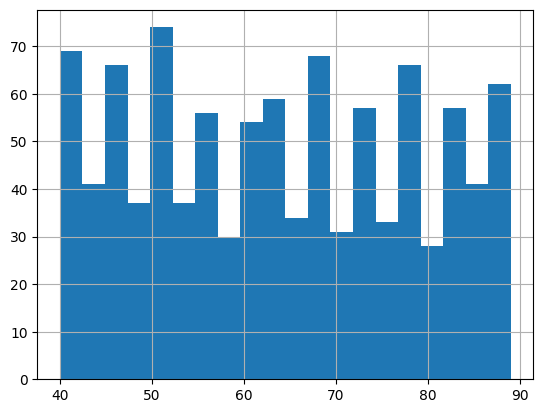

In [ ]:
df_before['before_score'].hist(bins=20);

Размерность данных: два столбца, 1000 строк. Данные в корректном формате. Пропуски отсутствуют. Распределение также равномерное, но баллы ниже - от 40 до 90, аномалий и выбросов нет.

In [ ]:
df_group.head()

,student_id,group
0,1,no_course
1,2,course
2,3,course
3,4,course
4,5,course


In [ ]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  1000 non-null   int64 
 1   group       1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df_group['group'].value_counts()

no_course    512
course       488
Name: group, dtype: int64

Размерность данных: два столбца, 1000 строк. Данные в корректном формате. Пропуски отсутствуют. Наблюдается небольшой дисбаланс классов - посещавших курсы на 24 студента меньше, чем не посещавших. Такой небольшой дисбаланс не должен повлиять на исследование.

Объединим данные в один датафрейм, student_id назначим индексом. Затем создадим новый столбец difference, содержащий информацию о разнице баллов после и до посещения, с его помощью будем проверять гипотезу.



In [ ]:
df = df_before.merge(df_after, on='student_id').merge(df_group, on='student_id')
df.set_index('student_id', inplace=True)
df['difference'] = df['after_score'] - df['before_score']
df.head()

,before_score,after_score,group,difference
student_id,,,,
1,75,92,no_course,17
2,81,79,course,-2
3,58,92,course,34
4,47,90,course,43
5,76,98,course,22


## Проверка гипотезы

Проверка гипотезы: Разница между баллами после и до различается у студентов в зависимости от посещения подготовительных курсов.

* H_0: Разница между баллами после и до (difference) одинаковая у студентов обеих групп.
* H_a: Разница между баллами после и до (difference) различается в зависимости от группы.

Значение alpha возьмём стандартное = 0.05.

In [ ]:
course = df[df['group'] == 'course']['difference']
no_course = df[df['group'] == 'no_course']['difference']
alpha = 0.05

results = st.ttest_ind(course, no_course, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8609961477025574
Не получилось отвергнуть нулевую гипотезу


## Вывод

На основании t-теста можно сделать вывод о том, что нулевая гипотеза верна - разница между баллами после и до одинаковая у студентов обеих групп. Это означает, что у нас нет достаточных данных для того, чтобы утверждать, что разница между баллами после и до различается в зависимости от посещения подготовительных курсов.

T-тест целесообразно использовать для нашей задачи, так как они обычно эффективны при небольших размерах выборки и нормальном распределении данных.Также в различных сценариях можно использовать другие тесты, например:

* Wilcoxon Rank-Sum Test (Манна-Уитни): Непараметрический аналог t-теста для сравнения средних двух независимых выборок. Подходит для случаев, когда данные не имеют нормальное распределение.

* Bootstrap Test: Позволяет оценивать распределение параметра интереса, избегая предположений о распределении данных.
